In [337]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading in SmileOn Data

In [338]:
smile= pd.read_csv('data/SmileOn11.28.2020.csv',encoding = "ISO-8859-1")
smile.head(1)

C:\Users\18285\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (32,36,53,59,88,89,127,141,144,156,157,158,159) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
0,81381827,SMILE ON 60+ Registration,NaN,11/25/2020 16:46,11/25/2020 16:48,2,3859874,136529,NaN,NaN,...,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN


# New DF w/ Less Columns - smile_small

In [339]:
smile_small = pd.DataFrame() 

#### -  Renaming Columns

In [340]:
smile_small['ID'] = smile['CallerNum']

In [341]:
smile_small['last_screening'] = smile['SMILE ON 60+ Screening - Last Screening Date']

In [342]:
smile_small['call_date'] = smile['CallDateAndTimeStart']

In [343]:
smile_small['care_provided'] = smile['SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)']

In [344]:
smile_small['clinic'] = smile['SMILE ON 60+ Site Information - Enroller ID']

In [345]:
smile_small['plan_completed'] = smile['SMILE ON 60+ Treatment Plan - Is the treatment plan completed?']

In [346]:
smile_small['plan_developed'] = smile['SMILE ON 60+ Treatment Plan - Was a treatment plan developed?']

In [347]:
smile_small['function_restored'] = smile['SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)']

In [348]:
smile_small['last_visit'] = smile['SMILE ON 60+ Demographic Information - When is the last time you visited your dentist?']

In [349]:
smile_small['trans_arranged'] = smile['SMILE ON 60+ Verification of Eligibility - Transportation Arranged']

In [350]:
smile_small['eligible'] = smile['SMILE ON 60+ Verification of Eligibility - Verification of Eligibility']

In [351]:
smile_small['trans_provided'] = smile['SMILE ON 60+ Clinic Information - Was initial transportation assistance or referral provided?']

In [352]:
smile_small['all_barriers']= smile['SMILE ON 60+ Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply)']

In [353]:
smile_small['income'] = smile['SMILE ON 60+ Demographic Information - Household Income Level']

In [354]:
smile_small['last_visit'] = smile['SMILE ON 60+ Demographic Information - When is the last time you visited your dentist?']

In [355]:
smile_small['version'] = smile['ReportVersion']

In [356]:
smile_small['referral_status']= smile['SMILE ON 60+ Base-line Oral and Conditions Questions - Did the client commit to referral?']

In [357]:
smile_small['city'] = smile['CityName']

In [358]:
smile_small['county'] = smile['CountyName']

#### Convert call_date to datetime 

In [359]:
smile_small['call_date'] = pd.to_datetime(smile_small['call_date'])

In [360]:
smile_small.head(1)

,ID,last_screening,call_date,care_provided,clinic,plan_completed,plan_developed,function_restored,last_visit,trans_arranged,eligible,trans_provided,all_barriers,income,version,referral_status,city,county
0,3859874,NaN,2020-11-25 16:46:00,NaN,Matthew Walker Comprehensive Health Center Inc...,NaN,NaN,NaN,3 to 5 years,NaN,NaN,NaN,Transportation; Dental cost; No insurance,$0 - $21 280,SMILE ON 60+ Registration,Yes,Springfield,Robertson


In [361]:
#smile_small.info()

#### - Value Counts of Columns

In [362]:
smile_small.function_restored.value_counts()

No     8127
Yes    6149
Name: function_restored, dtype: int64

In [363]:
smile_small.city.value_counts()

Nashville       6456
Memphis         6304
Murfreesboro    2435
Cleveland       1718
Knoxville       1461
                ... 
Dungannon          1
Huron              1
Rutherford         1
Olive Branch       1
Duluth             1
Name: city, Length: 387, dtype: int64

In [364]:
smile_small.county.value_counts()

Davidson           9299
Shelby             7398
Rutherford         3837
Sullivan           2209
Bradley            1789
                   ... 
Desoto                1
TN                    1
Winchester City       1
McNairy               1
Pulaski               1
Name: county, Length: 104, dtype: int64

In [365]:
smile_small.trans_provided.value_counts()

No     3600
Yes     175
Name: trans_provided, dtype: int64

In [366]:
smile_small.ID.value_counts()

-1          70
 2441776    36
 2431132    31
 2416076    29
 2466994    28
            ..
 3825101     1
 3743280     1
 2653820     1
 3686036     1
 3821558     1
Name: ID, Length: 8708, dtype: int64

In [367]:
smile_2441776 = smile_small[smile_small['ID'] == 2441776]

In [368]:
smile_small.all_barriers.value_counts()

Dental cost; No insurance                                                                            14479
Dental cost                                                                                          10497
No insurance                                                                                          2956
Transportation; Dental cost; No insurance                                                             1213
Transportation; Dental cost                                                                            952
Dental cost; No insurance; Fear                                                                        812
Dental cost; Fear                                                                                      614
Dental cost; No insurance; Physical mobility and health                                                453
Dental cost; Physical mobility and health                                                              386
Fear                                 

In [369]:
smile_small.plan_completed.value_counts()

No     12431
Yes     5104
Name: plan_completed, dtype: int64

In [370]:
smile_small.plan_developed.value_counts()

Yes    15930
No      1098
Name: plan_developed, dtype: int64

In [371]:
smile_small.last_visit.value_counts()

Less than 12 months    16751
More than 5 years       8533
1 to 2 years            7077
3 to 5 years            4863
Name: last_visit, dtype: int64

In [372]:
smile_small.trans_arranged.value_counts()

No     5483
Yes     342
Name: trans_arranged, dtype: int64

In [373]:
smile_small.income.value_counts()

$0 - $21 280     28983
$21246-$24280     5220
$24281-$27315     1600
$28806-$32920     1439
$32921-$37035      429
$36366-$41560      191
$41561-$46755      151
$50201-$56475       42
$43926-$50200       40
$51486-$58840       13
$76121-$85635       12
$59046-$67480       11
$58841-$66195        9
$84761-$95355        3
$66606-$76120        3
$67481-$75915        2
Name: income, dtype: int64

In [374]:
smile_small.last_visit.value_counts()

Less than 12 months    16751
More than 5 years       8533
1 to 2 years            7077
3 to 5 years            4863
Name: last_visit, dtype: int64

In [375]:
smile_small.version.value_counts()

SMILE ON 60+ Clinical        27432
SMILE ON 60+ Registration    12600
Name: version, dtype: int64

In [376]:
smile_small.referral_status.value_counts()

Yes    27818
No      1436
Name: referral_status, dtype: int64

# Who made the most phone calls?

In [377]:
call_count = smile_small['ID'].value_counts().rename_axis('ID').reset_index(name='counts')

In [378]:
call_count.head()

,ID,counts
0,-1,70
1,2441776,36
2,2431132,31
3,2416076,29
4,2466994,28


In [379]:
smile_2441776 = smile_2441776.sort_values(by = 'call_date')
smile_2441776.head(38)

,ID,last_screening,call_date,care_provided,clinic,plan_completed,plan_developed,function_restored,last_visit,trans_arranged,eligible,trans_provided,all_barriers,income,version,referral_status,city,county
38749,2441776,NaN,2018-09-24 16:04:00,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,Less than 12 months,NaN,NaN,NaN,Dental cost,$0 - $21 280,SMILE ON 60+ Registration,NaN,Antioch,Davidson
38748,2441776,NaN,2018-09-24 16:12:00,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,Less than 12 months,NaN,NaN,NaN,Dental cost,$0 - $21 280,SMILE ON 60+ Clinical,Yes,Antioch,Davidson
38747,2441776,NaN,2018-09-24 16:17:00,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,Less than 12 months,NaN,NaN,NaN,Dental cost,$0 - $21 280,SMILE ON 60+ Clinical,Yes,Antioch,Davidson
38724,2441776,9/25/2018,2018-09-25 12:55:00,1110 - Prophylaxis-adult - 45; 1330 - Oral Hyg...,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,Less than 12 months,NaN,NaN,NaN,Dental cost,$0 - $21 280,SMILE ON 60+ Clinical,Yes,Antioch,Davidson
38703,2441776,NaN,2018-09-25 14:35:00,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,Less than 12 months,NaN,NaN,NaN,Dental cost,$0 - $21 280,SMILE ON 60+ Clinical,Yes,Antioch,Davidson
38692,2441776,9/25/2018,2018-09-26 08:06:00,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,Less than 12 months,No,Yes,No,Dental cost,$0 - $21 280,SMILE ON 60+ Clinical,Yes,Antioch,Davidson
37140,2441776,9/25/2018,2018-11-07 09:37:00,2332 - Resin three surfaces - Anterior - 15,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,Less than 12 months,NaN,NaN,NaN,Dental cost,$0 - $21 280,SMILE ON 60+ Clinical,Yes,Antioch,Davidson
36270,2441776,9/25/2018,2018-12-03 10:23:00,220 - Intraoral - Periapical First Film - 5; 2...,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,Less than 12 months,NaN,NaN,NaN,Dental cost,$0 - $21 280,SMILE ON 60+ Clinical,Yes,Antioch,Davidson
36141,2441776,9/25/2018,2018-12-05 10:27:00,220 - Intraoral - Periapical First Film - 5; 2...,Interfaith Dental Clinic - Nashville,NaN,Yes,NaN,Less than 12 months,NaN,NaN,NaN,Dental cost,$0 - $21 280,SMILE ON 60+ Clinical,Yes,Antioch,Davidson
33805,2441776,9/25/2018,2019-02-18 10:39:00,150 - Comprehensive Oral Evaluation -new or es...,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,Less than 12 months,NaN,NaN,NaN,Dental cost,$0 - $21 280,SMILE ON 60+ Clinical,Yes,Antioch,Davidson


# Creating a 'Clinical DF'

In [380]:
clinical = smile_small[smile_small['version'] == 'SMILE ON 60+ Clinical']

In [381]:
clinical.head(1)
clinical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27432 entries, 2 to 40031
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 27432 non-null  int64         
 1   last_screening     14892 non-null  object        
 2   call_date          27432 non-null  datetime64[ns]
 3   care_provided      24849 non-null  object        
 4   clinic             27236 non-null  object        
 5   plan_completed     17535 non-null  object        
 6   plan_developed     17028 non-null  object        
 7   function_restored  14276 non-null  object        
 8   last_visit         25535 non-null  object        
 9   trans_arranged     5825 non-null   object        
 10  eligible           8718 non-null   object        
 11  trans_provided     3775 non-null   object        
 12  all_barriers       23962 non-null  object        
 13  income             26347 non-null  object        
 14  versio

In [382]:
clinical.ID.value_counts()

-1          68
 2441776    35
 2431132    30
 2416076    28
 2860770    27
            ..
 3165725     1
 2758182     1
 2520618     1
 2653739     1
 2673933     1
Name: ID, Length: 5419, dtype: int64

In [383]:
clinical.last_screening.value_counts()

6/13/2019    240
8/28/2019    135
3/28/2019    125
10/7/2019    110
9/25/2018    110
            ... 
9/7/2018       1
6/2/2020       1
8132019        1
11262019       1
11/2/2019      1
Name: last_screening, Length: 627, dtype: int64

In [384]:
#clinical.care_provided.value_counts()

In [385]:
clinic_count = clinical.clinic.value_counts()
clinic_count = clinic_count[:10,]
clinic_count.head()

Interfaith Dental Clinic - Nashville                           5139
Interfaith Dental Clinic - Murfreesboro                        3323
Church Health Center - Memphis                                 2821
Matthew Walker Comprehensive Health Center Inc. - Nashville    1993
Interfaith Health Clinic of Knoxville - Knoxville              1568
Name: clinic, dtype: int64

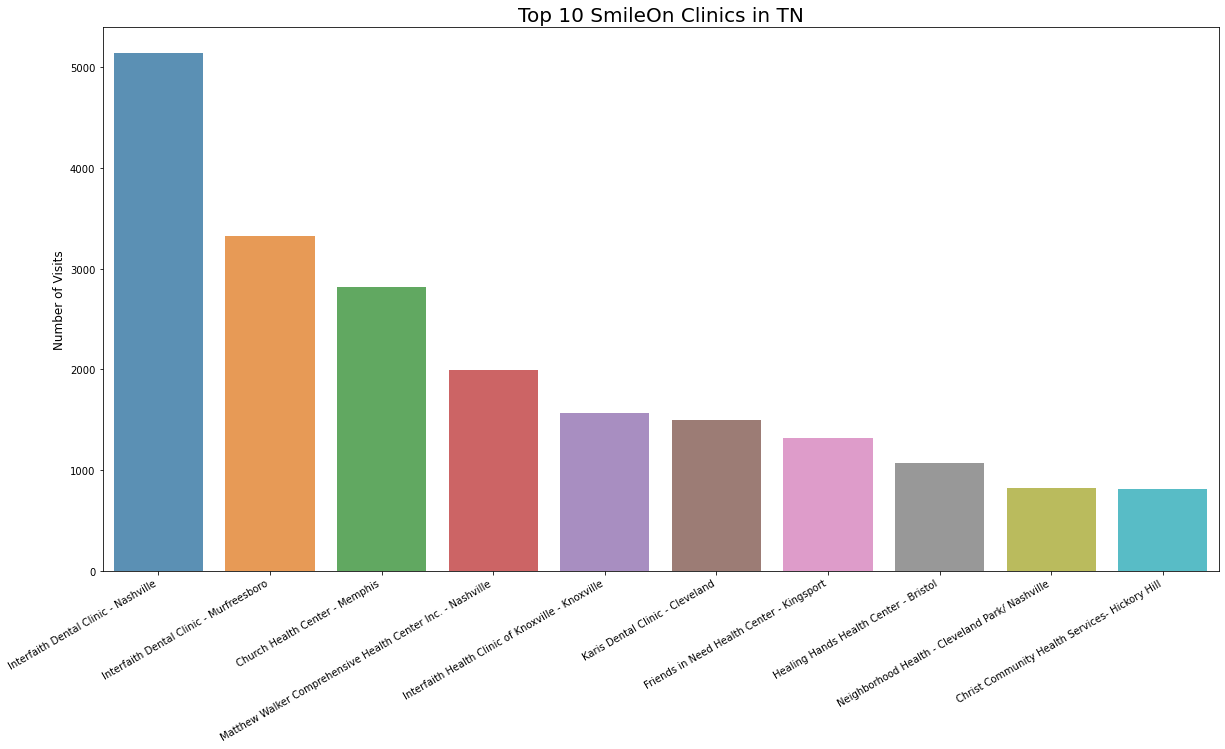

In [386]:
plt.figure(figsize=(20,10))
sns.barplot(clinic_count.index, clinic_count.values, alpha=0.8)
plt.title('Top 10 SmileOn Clinics in TN',fontsize=20)
plt.ylabel('Number of Visits', fontsize=12)
plt.xticks(rotation=30, ha = 'right')
plt.show()

In [387]:
clinical.plan_completed.value_counts()

No     12431
Yes     5104
Name: plan_completed, dtype: int64

In [388]:
clinical.plan_developed.value_counts()

Yes    15930
No      1098
Name: plan_developed, dtype: int64

In [389]:
clinical.function_restored.value_counts()

No     8127
Yes    6149
Name: function_restored, dtype: int64

In [390]:
smile_small['caller_num'] = smile['CallerNum']
smile_small['last_screening'] = smile['SMILE ON 60+ Screening - Last Screening Date']
smile_small['care_provided'] = smile['SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)']
smile_small['enroller_id'] = smile['SMILE ON 60+ Site Information - Enroller ID']
smile_small['plan_completed'] = smile['SMILE ON 60+ Treatment Plan - Is the treatment plan completed?']
smile_small['plan_developed'] = smile['SMILE ON 60+ Treatment Plan - Was a treatment plan developed?']
smile_small['function_restored'] = smile['SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)']

In [391]:
my_list = ['Yes']
plan_completed_yes = smile_small.query("plan_completed in @my_list")
plan_completed_yes.head(130)

,ID,last_screening,call_date,care_provided,clinic,plan_completed,plan_developed,function_restored,last_visit,trans_arranged,eligible,trans_provided,all_barriers,income,version,referral_status,city,county,caller_num,enroller_id
2,2518680,NaN,2020-11-25 15:02:00,5650 - Add tooth to existing partial denture - 30,Friends in Need Health Center - Kingsport,Yes,Yes,Yes,Less than 12 months,NaN,NaN,NaN,Dental cost,$0 - $21 280,SMILE ON 60+ Clinical,Yes,Rogersville,Hawkins,2518680,Friends in Need Health Center - Kingsport
9,3858402,11/24/2020,2020-11-25 11:46:00,140 - Limited Oral evaluation - problem focuse...,Christ Community Health Services- Raleigh,Yes,No,NaN,More than 5 years,No,Yes,No,Dental cost; No insurance,$0 - $21 280,SMILE ON 60+ Clinical,NaN,Memphis,Shelby,3858402,Christ Community Health Services- Raleigh
16,3742718,NaN,2020-11-25 08:37:00,2335 - Resin four surfaces or w incis - Anteri...,Friends in Need Health Center - Kingsport,Yes,Yes,NaN,Less than 12 months,NaN,NaN,NaN,Dental cost,$0 - $21 280,SMILE ON 60+ Clinical,NaN,Rogersville,Hawkins,3742718,Friends in Need Health Center - Kingsport
31,3360378,NaN,2020-11-24 12:53:00,140 - Limited Oral evaluation - problem focuse...,Friends in Need Health Center - Kingsport,Yes,Yes,NaN,1 to 2 years,NaN,NaN,NaN,Dental cost,$21246-$24280,SMILE ON 60+ Clinical,NaN,Jonesborough,Washington,3360378,Friends in Need Health Center - Kingsport
34,2835036,NaN,2020-11-24 11:22:00,5750 - Reline complete maxillary denture - lab...,Christ Community Health Services- Raleigh,Yes,No,Yes,Less than 12 months,NaN,NaN,NaN,Dental cost; No insurance,$0 - $21 280,SMILE ON 60+ Clinical,Yes,Memphis,Shelby,2835036,Christ Community Health Services- Raleigh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,2819311,8/31/2020,2020-10-27 11:49:00,No Code - Denture step Mandibular: may be used...,Interfaith Dental Clinic - Nashville,Yes,Yes,Yes,1 to 2 years,NaN,NaN,NaN,Dental cost,$24281-$27315,SMILE ON 60+ Clinical,Yes,Goodlettsville,Davidson,2819311,Interfaith Dental Clinic - Nashville
1145,2960927,NaN,2020-10-27 11:40:00,5211 - Partial denture -resin base-maxillary -...,Christ Community Health Services- Hickory Hill,Yes,Yes,Yes,Less than 12 months,NaN,NaN,NaN,Dental cost,NaN,SMILE ON 60+ Clinical,Yes,Memphis,Shelby,2960927,Christ Community Health Services- Hickory Hill
1147,3065725,NaN,2020-10-27 11:30:00,No Code - Denture step Mandibular: may be used...,Healing Hands Health Center - Bristol,Yes,Yes,Yes,Less than 12 months,NaN,NaN,NaN,No insurance,$0 - $21 280,SMILE ON 60+ Clinical,NaN,Bristol,Sullivan,3065725,Healing Hands Health Center - Bristol
1152,2957321,NaN,2020-10-27 10:54:00,120 - Periodic Oral Evaluation - 15; 220 - Int...,Interfaith Dental Clinic - Nashville,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,$0 - $21 280,SMILE ON 60+ Clinical,NaN,Brentwood,Williamson,2957321,Interfaith Dental Clinic - Nashville


In [392]:
completed_yes_count = plan_completed_yes.city.value_counts()
completed_yes_count = completed_yes_count[:10,]
completed_yes_count.head(10)

Memphis         865
Nashville       641
Kingsport       365
Cleveland       259
Knoxville       250
Murfreesboro    199
Johnson City    174
Bristol         153
Antioch          90
Bluff City       68
Name: city, dtype: int64

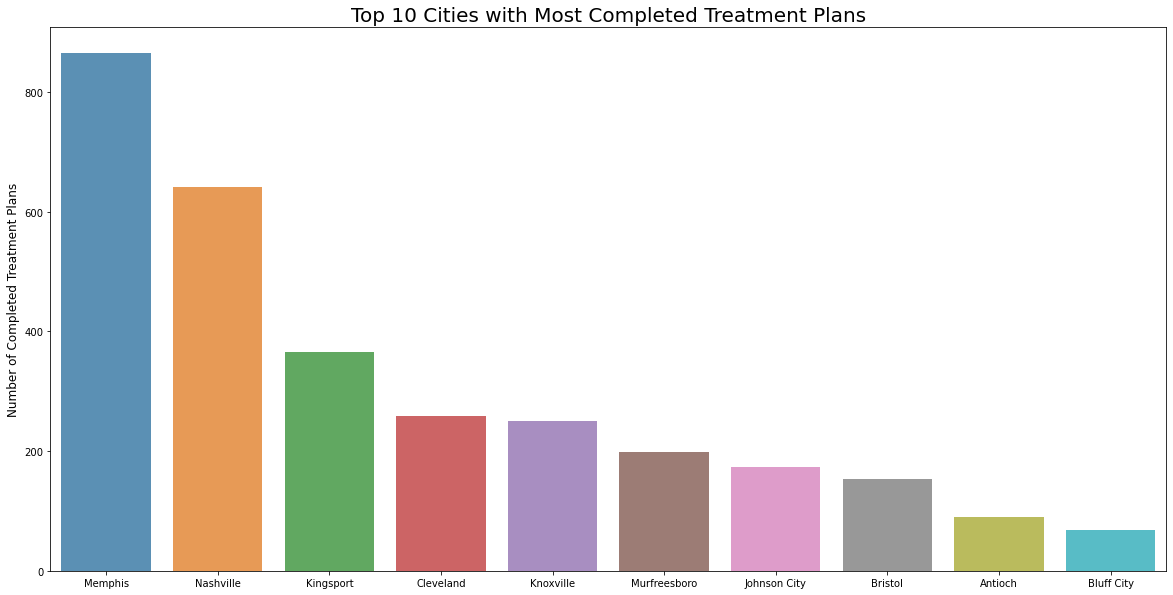

In [393]:
plt.figure(figsize=(20,10))
sns.barplot(completed_yes_count.index, completed_yes_count.values, alpha=0.8)
plt.title('Top 10 Cities with Most Completed Treatment Plans',fontsize=20)
plt.ylabel('Number of Completed Treatment Plans', fontsize=12)
#plt.xticks(rotation=180, ha = 'right')
plt.show()

# Creating a 'Registration Only' DF

In [394]:
registration = smile_small[smile_small['version'] == 'SMILE ON 60+ Registration']

In [395]:
registration.head(1)
registration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12600 entries, 0 to 40028
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 12600 non-null  int64         
 1   last_screening     0 non-null      object        
 2   call_date          12600 non-null  datetime64[ns]
 3   care_provided      0 non-null      object        
 4   clinic             5565 non-null   object        
 5   plan_completed     0 non-null      object        
 6   plan_developed     0 non-null      object        
 7   function_restored  0 non-null      object        
 8   last_visit         11689 non-null  object        
 9   trans_arranged     0 non-null      object        
 10  eligible           0 non-null      object        
 11  trans_provided     0 non-null      object        
 12  all_barriers       10652 non-null  object        
 13  income             11801 non-null  object        
 14  versio

In [396]:
registration.ID.value_counts()

2758373    19
3212379    18
3483924    16
2682296    15
2847750    12
           ..
2995750     1
2457629     1
2883677     1
3213348     1
2647055     1
Name: ID, Length: 8683, dtype: int64

In [397]:
registration.last_screening.value_counts()

Series([], Name: last_screening, dtype: int64)

In [398]:
registration.care_provided.value_counts()

Series([], Name: care_provided, dtype: int64)

In [399]:
registration.clinic.value_counts()

Church Health Center - Memphis                                                          760
Interfaith Dental Clinic - Nashville                                                    663
Matthew Walker Comprehensive Health Center Inc. - Nashville                             523
Interfaith Dental Clinic - Murfreesboro                                                 383
Karis Dental Clinic - Cleveland                                                         316
Healing Hands Health Center - Bristol                                                   280
Keystone Dental Care Inc. - Johnson City                                                260
Interfaith Health Clinic of Knoxville - Knoxville                                       254
Friends in Need Health Center - Kingsport                                               246
Christ Community Health Services- Broad Avenue                                          180
Christ Community Health Services- Hickory Hill                                  

In [400]:
registration['plan_completed'].value_counts()

Series([], Name: plan_completed, dtype: int64)

In [401]:
registration.plan_developed.value_counts()

Series([], Name: plan_developed, dtype: int64)

In [402]:
registration.function_restored.value_counts()

Series([], Name: function_restored, dtype: int64)

In [403]:
# call_count = smile_small['ID'].value_counts().rename_axis('ID').reset_index(name='counts')

In [404]:
#pd.set_option('display.max_rows', 105)
#county_count.head(105)

In [405]:
teeth_loss = pd.read_csv('data/500_Cities__Local_Data_for_Better_Health__2019_release(1).csv')
teeth_loss.head(1)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2016,TN,Tennessee,Nashville,Census Tract,BRFSS,Health Outcomes,4752006-47037018407,All teeth lost among adults aged >=65 Years,%,...,11.8,NaN,NaN,3813,"(36.0655938524, -86.9777719034)",HLTHOUT,TEETHLOST,4752006,4.703702e+10,Teeth Loss


In [406]:
#teeth_loss['PopulationCount']=teeth_loss['PopulationCount'].str.replace(',','').astype(float)
#population["population"]=population["population"].str.replace(',','').astype(int)

In [407]:
city_only_list = ['City']
city_only = teeth_loss.query("GeographicLevel in @city_only_list")
city_only.head(1)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
14,2016,TN,Tennessee,Murfreesboro,City,BRFSS,Health Outcomes,4751560,All teeth lost among adults aged >=65 Years,%,...,16.7,NaN,NaN,108755,"(35.850778195, -86.408628238)",HLTHOUT,TEETHLOST,4751560,NaN,Teeth Loss


In [410]:
city_only['teeth_loss_count'] = teeth_loss['Data_Value_Unit']*teeth_loss['PopulationCount']

<ipython-input-410-bb48843e603a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_only['teeth_loss_count'] = teeth_loss['Data_Value_Unit']*teeth_loss['PopulationCount']


In [411]:
city_only.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text,teeth_loss_count
14,2016,TN,Tennessee,Murfreesboro,City,BRFSS,Health Outcomes,4751560,All teeth lost among adults aged >=65 Years,%,...,NaN,NaN,108755,"(35.850778195, -86.408628238)",HLTHOUT,TEETHLOST,4751560,NaN,Teeth Loss,%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%...
71,2016,TN,Tennessee,Memphis,City,BRFSS,Health Outcomes,4748000,All teeth lost among adults aged >=65 Years,%,...,NaN,NaN,646889,"(35.1046295042, -89.978906085)",HLTHOUT,TEETHLOST,4748000,NaN,Teeth Loss,%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%...
89,2016,TN,Tennessee,Nashville,City,BRFSS,Health Outcomes,4752006,All teeth lost among adults aged >=65 Years,%,...,NaN,NaN,601222,"(36.1712229904, -86.7845944773)",HLTHOUT,TEETHLOST,4752006,NaN,Teeth Loss,%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%...
119,2016,TN,Tennessee,Knoxville,City,BRFSS,Health Outcomes,4740000,All teeth lost among adults aged >=65 Years,%,...,NaN,NaN,178874,"(35.9690594531, -83.9495877264)",HLTHOUT,TEETHLOST,4740000,NaN,Teeth Loss,%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%...
214,2016,TN,Tennessee,Knoxville,City,BRFSS,Health Outcomes,4740000,All teeth lost among adults aged >=65 Years,%,...,NaN,NaN,178874,"(35.9690594531, -83.9495877264)",HLTHOUT,TEETHLOST,4740000,NaN,Teeth Loss,%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%...
